In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# allow multiple outputs in one cell in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
%qtconsole

In [18]:
norm_data = pd.read_csv('/Users/cgu3/Documents/Crispr/report/all_sample/all_sample.normalized.txt', sep='\t', header=0, index_col=0)
# get number of rows
len(norm_data)

103650

In [19]:
norm_data

,Gene,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6
sgRNA,,,,,,,,,,,,,
negative_control_1,negative_control_1,0.000000,0.000000,0.000000,303.209771,0.000000,0.000000,33.209352,511.767188,380.105300,284.743489,214.120812,0.000000
negative_control_10,negative_control_10,487.132662,397.089548,1283.559677,593.868374,1810.374657,3.781973,0.000000,281.507054,0.000000,276.590041,306.455437,0.000000
negative_control_100,negative_control_100,250.041510,161.512828,0.000000,275.465086,0.000000,0.000000,1026.833162,353.814352,675.946292,95.959810,266.656030,0.000000
negative_control_1000,negative_control_1000,549.892085,0.000000,3.646476,239.793348,0.000000,3.781973,221.838471,637.427444,0.000000,433.387117,105.866424,779.470102
negative_control_1001,negative_control_1001,0.000000,0.000000,3.646476,106.354625,0.000000,0.000000,0.000000,0.000000,0.000000,212.616835,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzz3_1,Zzz3,374.564174,305.178934,1104.882335,517.900784,209.319576,0.000000,0.000000,116.534092,284.849996,419.588974,472.816960,0.000000
Zzz3_2,Zzz3,3108.085696,1229.639096,1637.267883,500.064916,138.214835,0.000000,1.328374,128.468306,0.000000,325.510729,212.528836,0.000000
Zzz3_3,Zzz3,0.000000,416.720942,0.000000,188.928092,391.475544,0.000000,2.656748,443.671965,1348.228919,528.719739,429.833600,0.000000


In [20]:
# remove sgRNAs start with negative_control
neg_controls = norm_data[norm_data.index.str.startswith('negative_control')]
norm_data = norm_data[~norm_data.index.str.startswith('negative_control')]

In [26]:
# aggregate sgRNAs with the same gene symbol and remove sgRNA column
norm_data = norm_data.groupby(norm_data['Gene']).sum()

In [27]:
norm_data
# remove genes with zero value in all columns
len(norm_data)

,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6
Gene,,,,,,,,,,,,
0610007P14Rik,503.071563,2088.066389,0.000000,2306.111784,4160.026848,760.176667,2138.682266,2381.226751,1344.565253,1842.679233,1185.226353,1873.385530
0610009B22Rik,1063.921642,350.688073,2545.240495,190.249268,262.048935,7.563947,1190.223174,1702.380563,1025.826351,728.792808,601.767040,631.105054
0610009D07Rik,789.971781,394.412540,0.000000,378.516772,690.275244,2148.160929,654.888420,1684.128236,2137.748843,1228.034696,727.533168,0.000000
0610009O20Rik,123.526483,398.874220,2217.057623,747.785316,460.183496,574.859967,3096.439976,1849.803210,377.357551,818.480735,1347.607935,1051.841757
0610010F05Rik,636.559859,1526.787005,3168.787952,1448.668904,1330.217919,1319.908740,2608.926689,1201.143564,789.519924,1529.085082,2458.011402,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,1605.844276,973.538645,543.324977,1272.952566,1530.749269,3694.988077,1876.992572,1962.827239,512.913176,871.791741,652.710282,0.000000
Zzef1,448.281591,2353.090200,1148.640052,650.018332,429.025239,2276.748027,2719.181738,1299.425329,991.021529,1615.637067,1504.417600,2314.051866
Zzz3,4101.278465,2121.975159,3558.960922,1534.545309,1863.104016,0.000000,1029.489910,1661.663832,2161.562669,1971.880023,1509.989517,823.758176


19923

In [28]:
# get min and max value in each column
norm_data.min()
norm_data.max()

sample_wt_1     0.0
sample_wt_2     0.0
sample_wt_3     0.0
sample_wt_4     0.0
sample_wt_5     0.0
sample_wt_6     0.0
sample_het_1    0.0
sample_het_2    0.0
sample_het_3    0.0
sample_het_4    0.0
sample_het_5    0.0
sample_het_6    0.0
dtype: float64

sample_wt_1     34024.572741
sample_wt_2     40995.703435
sample_wt_3     21725.706118
sample_wt_4     15837.590954
sample_wt_5     25927.664934
sample_wt_6     47823.054491
sample_het_1     7191.817258
sample_het_2     6828.476593
sample_het_3    15217.950740
sample_het_4     4961.059473
sample_het_5    19768.365664
sample_het_6    35984.060114
dtype: float64

In [9]:
# find genes has non-zero in sample_het_1 and zero value in sample_wt_1
het_specific_group_1 = norm_data[(norm_data['sample_het_1'] > 0) & (norm_data['sample_wt_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_wt_1 and zero value in sample_het_1
wt_specific_group_1 = norm_data[(norm_data['sample_wt_1'] > 0) & (norm_data['sample_het_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_het_6 and zero value in sample_wt_6
het_specific_group_6 = norm_data[(norm_data['sample_het_6'] > 0) & (norm_data['sample_wt_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']]
# find genes has non-zero in sample_wt_6 and zero value in sample_het_6
wt_specific_group_6 = norm_data[(norm_data['sample_wt_6'] > 0) & (norm_data['sample_het_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']] 

In [10]:
len(het_specific_group_1)
len(wt_specific_group_1)
len(het_specific_group_6)
len(wt_specific_group_6)

625

280

3727

2793

In [11]:
# output the result to a file
het_specific_group_1.to_csv('/Users/cgu3/Documents/Crispr/report/sample_1/het_specific_group_1.txt', sep='\t')
wt_specific_group_1.to_csv('/Users/cgu3/Documents/Crispr/report/sample_1/wt_specific_group_1.txt', sep='\t')
het_specific_group_6.to_csv('/Users/cgu3/Documents/Crispr/report/sample_6/het_specific_group_6.txt', sep='\t')
wt_specific_group_6.to_csv('/Users/cgu3/Documents/Crispr/report/sample_6/wt_specific_group_6.txt', sep='\t')

In [12]:
# extract the gene symbol from the index in het_specific_group_1 as list
het_specific_group_1_gene_list = het_specific_group_1.index.tolist()
het_specific_group_6_gene_list = het_specific_group_6.index.tolist()
wt_specific_group_1_gene_list = wt_specific_group_1.index.tolist()
wt_specific_group_6_gene_list = wt_specific_group_6.index.tolist()

In [13]:
# find the minimum non-zero value in norm_data
non_zero_min = norm_data[norm_data > 0].min().min()
# replace zero value with the minimum non-zero value
norm_data = norm_data.replace(0, non_zero_min)
# calculate log2 ratio for each gene between het and wt
norm_data['log10_ratio_1'] = np.log10(norm_data['sample_het_1'] / norm_data['sample_wt_1'])
norm_data['log10_ratio_6'] = np.log10(norm_data['sample_het_6'] / norm_data['sample_wt_6'])

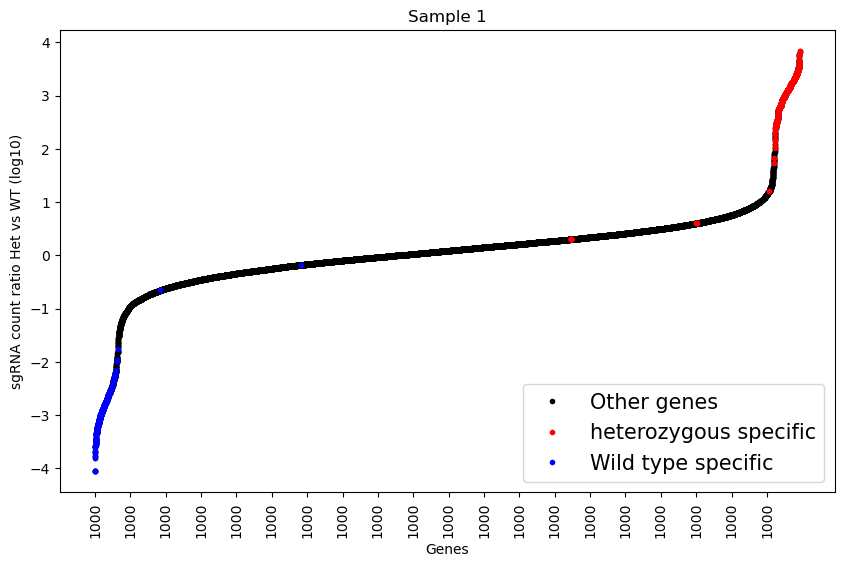

In [46]:
plot_data = norm_data['log10_ratio_1']
# sort the data in acsending order
plot_data = plot_data.sort_values()
plt.figure(figsize=(10, 6));
# plot the point of  data and use position as x-axis
plt.plot(plot_data, 'o', markersize=3, color='black');
plt.plot(plot_data.loc[het_specific_group_1_gene_list], 'o', markersize=3, color='red');
plt.plot(plot_data.loc[wt_specific_group_1_gene_list], 'o', markersize=3, color='blue');
plt.xlabel('Genes');
plt.ylabel('sgRNA count ratio Het vs WT (log10)');
plt.title('Sample 1');
# legend for the three groups
plt.legend(['Other genes', 'heterozygous specific', 'Wild type specific'], loc='lower right', fontsize=15);
# plot a x-axis tick "100" every 100 points with gene symbol as label
plt.xticks(range(0, len(plot_data), 1000),  labels=['1000'] * 20, rotation=90);

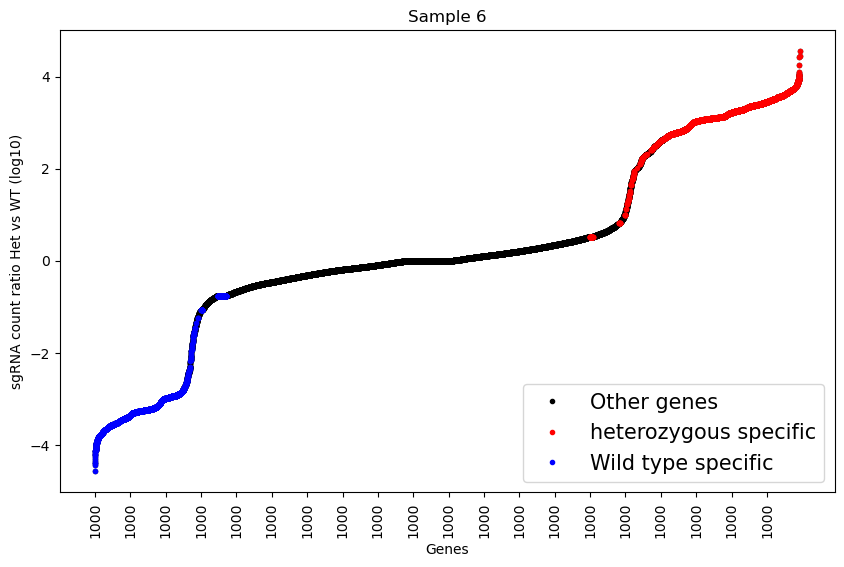

In [47]:
plot_data = norm_data['log10_ratio_6']
# sort the data in acsending order
plot_data = plot_data.sort_values()
plt.figure(figsize=(10, 6));
# plot the point of  data and use position as x-axis
plt.plot(plot_data, 'o', markersize=3, color='black');
plt.plot(plot_data.loc[het_specific_group_6_gene_list], 'o', markersize=3, color='red');
plt.plot(plot_data.loc[wt_specific_group_6_gene_list], 'o', markersize=3, color='blue');
plt.title('Sample 6');
plt.xlabel('Genes');
plt.ylabel('sgRNA count ratio Het vs WT (log10)');
# legend for the three groups
plt.legend(['Other genes', 'heterozygous specific', 'Wild type specific'], loc='lower right', fontsize=15);
# plot a x-axis tick "100" every 100 points with gene symbol as label
plt.xticks(range(0, len(plot_data), 1000),  labels=['1000'] * 20, rotation=90);

In [49]:
norm_data

,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,log10_ratio_1,log10_ratio_6
Gene,,,,,,,,,,,,,,
0610007P14Rik,503.071563,2088.066389,0.660588,2306.111784,4160.026848,760.176667,2138.682266,2381.226751,1344.565253,1842.679233,1185.226353,1873.385530,0.628516,0.391713
0610009B22Rik,1063.921642,350.688073,2545.240495,190.249268,262.048935,7.563947,1190.223174,1702.380563,1025.826351,728.792808,601.767040,631.105054,0.048719,1.921353
0610009D07Rik,789.971781,394.412540,0.660588,378.516772,690.275244,2148.160929,654.888420,1684.128236,2137.748843,1228.034696,727.533168,0.660588,-0.081444,-3.512136
0610009O20Rik,123.526483,398.874220,2217.057623,747.785316,460.183496,574.859967,3096.439976,1849.803210,377.357551,818.480735,1347.607935,1051.841757,1.399103,0.262388
0610010F05Rik,636.559859,1526.787005,3168.787952,1448.668904,1330.217919,1319.908740,2608.926689,1201.143564,789.519924,1529.085082,2458.011402,0.660588,0.612623,-3.300613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,1605.844276,973.538645,543.324977,1272.952566,1530.749269,3694.988077,1876.992572,1962.827239,512.913176,871.791741,652.710282,0.660588,0.067759,-3.747683
Zzef1,448.281591,2353.090200,1148.640052,650.018332,429.025239,2276.748027,2719.181738,1299.425329,991.021529,1615.637067,1504.417600,2314.051866,0.782887,0.007058
Zzz3,4101.278465,2121.975159,3558.960922,1534.545309,1863.104016,0.660588,1029.489910,1661.663832,2161.562669,1971.880023,1509.989517,823.758176,-0.600297,3.095869
